In [1]:
import numpy as np
# Creates vehicle and set values
from pyaat.aircraft import Aircraft
minhaAeronave = Aircraft()

# Aerodynamic coeficients
minhaAeronave.coef0 = [0.0252, 0.0, 0.382, 0.0, 0.0622, 0.0]
minhaAeronave.coefALPHA = [0.2010, 0.0, 6.29, 0.0, -0.363, 0.0]
minhaAeronave.coefBETA = [0.0, 0.785, 0.0, -0.121, 0.0, 0.174]
minhaAeronave.coefP = [0.0, -0.0794, 0.0, -0.522, 0.0, -0.0587]
minhaAeronave.coefQ = [0.281, 0.0, 14.6, 0.0, -45.5, 0.0]
minhaAeronave.coefR = [0.0, 0.572, 0.0, 0.254, 0.0, -0.277]

minhaAeronave.CLmax = 2.4

# Environment
minhaAeronave.Vinf = 224.6

minhaAeronave.set_control_surface('Profundor', [0.0126, 0.0, 0.3891, 0.0, -1.5980, 0.0],(np.radians(-30), np.radians(30)))
minhaAeronave.set_control_surface('Aileron', [0.0, 0.0094, 0.0, -0.1784, 0.0, 0.0080],(np.radians(-20), np.radians(30)))
minhaAeronave.set_control_surface('Leme', [0.0, -0.3030, 0.0, -0.0464, 0.0, -0.1594],(np.radians(-40), np.radians(40)))

# Geometric/inetia/structure parameters
minhaAeronave.Cbarw= 3.666
minhaAeronave.bw= 28.42
minhaAeronave.Sw= 95.0

#Inertia/ structure properties
minhaAeronave._mass = 45e3
minhaAeronave.Ixx = 0.554e6
minhaAeronave.Iyy = 2.53e6
minhaAeronave.Izz = 3.01e6
minhaAeronave.Ixz = 0.106e6
minhaAeronave.Izy = 0.0
minhaAeronave.Iyx = 0.0

minhaAeronave.qmax = 23052.05 # considering 700km/h at sea level

from pyaat.atmosphere import atmosCOESA
minhaAtmosfera = atmosCOESA()

from pyaat.gravity import Earth_NewtonGravity
minhaGravidade = Earth_NewtonGravity()

from pyaat.propulsion import JetModel

MotorEsquerdo = JetModel()
MotorEsquerdo.name = 'Motor esquerdo'
MotorEsquerdo.Fmaxi = 35e3
MotorEsquerdo.nrho = 0.775
MotorEsquerdo.rhoi = 0.41271
MotorEsquerdo.nv = 0
MotorEsquerdo.Vi = 200
MotorEsquerdo.position = np.array([0, -5.0, 1.42])
MotorEsquerdo.attitude = np.array([0., np.radians(0.), 0.])

MotorDireito = JetModel()
MotorDireito.name = 'Motor direito'
MotorDireito.Fmaxi = 35e3
MotorDireito.nrho = 0.775
MotorDireito.rhoi = 0.41271
MotorDireito.nv = 0
MotorDireito.Vi = 200
MotorDireito.position = np.array([0, 5, 1.42])
MotorDireito.attitude = np.array([0., np.radians(0.), 0.])

minhaPropulsao = [MotorEsquerdo, MotorDireito]

from system import system
meuSistema = system(atmosphere = minhaAtmosfera, propulsion = minhaPropulsao, aircraft = minhaAeronave, gravity = minhaGravidade)

In [3]:
from system import system
System = system(atmosphere = minhaAtmosfera, propulsion = minhaPropulsao, aircraft = minhaAeronave, gravity = minhaGravidade)

/home/ydor9e/Documents/PyAAT/pyaat/performance.py:88: RuntimeWarning: divide by zero encountered in true_divide
  (2*self.k*(self.mass*self.g)**2)/(rho*V*self.S) - Pmax)


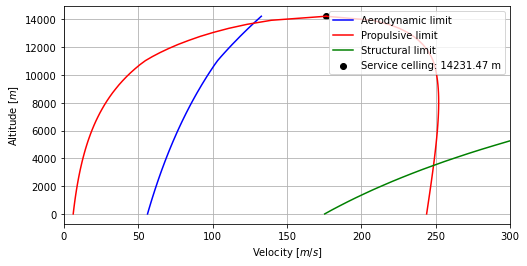

In [5]:
import matplotlib.pyplot as plt

from performance import Envelope
Envelope(System, limits = [0,300])

plt.savefig('Envelope.pdf', dpi = 400,bbox_inches='tight')